## Extracted Hands

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import re
import cv2
%matplotlib inline

In [5]:
participants = ['p1', 'p3', 'p4', 'p6']
exercises = ['a', 'b', 'c', 'd', 'e']

In [6]:
# parse hands based on participant
def parse_participant_hands(X, y, filenames, participant, exercise=""):
    # extracts a participants hands from a given set of X, y data and a list of filenames
    # optionally extract a specfic exercise from the data
    
    r = re.compile(participant + exercise)

    # remove p data
    vmatch = np.vectorize(lambda x:bool(r.search(x)))
    p_files = vmatch(filenames)

    return X[p_files], y[p_files], filenames[p_files]

### Loading the Data

In [7]:
hands = np.load("data/hands/hands-M5-rad0.15-pall.npz")

In [8]:
# Get hands and labels from the compressed numpy file
lhs = hands["lh_dmaps"]
y_lh = hands["y_lh"]

rhs = hands["rh_dmaps"]
y_rh = hands["y_rh"]

filenames = hands["filenames"]

assert lhs.shape == y_lh.shape == rhs.shape == y_rh.shape == filenames.shape

In [9]:
print("Left Hand Info\t", lhs.shape, lhs.dtype)
print("   Labels Info\t", y_lh.shape, y_lh.dtype)
print("Rght Hand Info\t", rhs.shape, rhs.dtype)
print("   Labels Info\t", y_rh.shape, y_rh.dtype)
print("Filename Info\t", filenames.shape, filenames.dtype)

Left Hand Info	 (15817,) object
   Labels Info	 (15817,) int64
Rght Hand Info	 (15817,) object
   Labels Info	 (15817,) int64
Filename Info	 (15817,) <U30


In [10]:
lh_avg_shape = np.array([0,0])
rh_avg_shape = np.array([0,0])

lh_max_shape = [0,0]
rh_max_shape = [0,0]


for lh, rh in zip(lhs, rhs):
    
    lh_avg_shape += lh.shape
    rh_avg_shape += rh.shape
    
    if lh.shape[0] >= lh_max_shape[0]:
        lh_max_shape[0] = lh.shape[0]
        
    if lh.shape[1] >= lh_max_shape[1]:
        lh_max_shape[1] = lh.shape[1]
        
    if rh.shape[0] >= rh_max_shape[0]:
        rh_max_shape[0] = rh.shape[0]
        
    if rh.shape[1] >= rh_max_shape[1]:
        rh_max_shape[1] = rh.shape[1]
    
print("Avg LH Shape", lh_avg_shape / len(lhs))
print("Avg RH Shape", rh_avg_shape / len(rhs))
print()
print("Max LH Shape", lh_max_shape)
print("Max RH Shape", rh_max_shape)

Avg LH Shape [ 161.73800341   88.92021243]
Avg RH Shape [ 160.99127521   91.69697161]

Max LH Shape [189, 130]
Max RH Shape [184, 125]


### TESTING SHIT

In [11]:
h = lhs[filenames == "data/posture/p3/p3c/000425.bin"][0].astype(int)

In [12]:
from vpt.features.features import *

In [13]:
x = extract_features(h, 'honv')
print(x.shape)

(72900,)


### Visualize a pair of hands

In [14]:
lh = lhs[filenames == "data/posture/p3/p3c/000425.bin"][0].astype(int)
rh = rhs[filenames == "data/posture/p3/p3c/000425.bin"][0].astype(int)
rh = rh[:,::-1]  #flip image vertically for same orientation as lh

In [15]:
#normalize images
lh_norm = np.zeros_like(lh, dtype=float)
lh_norm[lh!=0] = (lh[lh!=0]-lh[lh!=0].min())/(lh[lh!=0].max()-lh[lh!=0].min())

rh_norm = np.zeros_like(rh, dtype=float)
rh_norm[rh!=0] = (rh[rh!=0]-rh[rh!=0].min())/(rh[rh!=0].max()-rh[rh!=0].min())

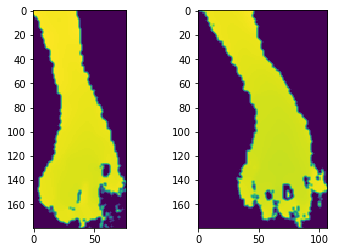

In [16]:
plt.figure(figsize=(6,4))
plt.subplot(121)
plt.imshow(lh_norm)
plt.subplot(122)
plt.imshow(rh_norm)
plt.show()

### Extracting Partipants and Exercises

In [ ]:
# combine rh and lh for training a single model
hands_comb = np.hstack((lhs, rhs))
y = np.hstack((y_lh, y_rh))
files_comb = np.hstack((filenames, filenames))

assert hands_comb.shape == y.shape == files_comb.shape, "Error combining hands.  Array shapes are different sizes"

In [ ]:
for p in participants:
    
    print("Particpant {}".format(p))
    for e in exercises:
        p_hands, p_y, p_files = parse_participant_hands(hands_comb, y, files_comb, p, e)
        
        print("\tEx {}".format(e))
        print("\tLabel 0:", p_y[p_y==0].shape)
        print("\tLabel 1:", p_y[p_y==1].shape)
        print("\tLabel 2:", p_y[p_y==2].shape)
        print()

### TEst

In [9]:
a = np.array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5])

In [10]:
a.shape

(15,)

In [13]:
n = np.reshape(a, (3,5))

In [14]:
n

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])